In [ ]:
#Kaggle Colab Integration
!pip install -q kaggle
from google.colab import files
!gdown --id 11hI5JKwHv7xAwGDCRWzTNUxjlS0dTgNN
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11hI5JKwHv7xAwGDCRWzTNUxjlS0dTgNN
To: /content/kaggle.json
100% 68.0/68.0 [00:00<00:00, 174kB/s]
ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide            Covid Cases and Deaths WorldWide                     8KB  2023-02-01 12:22:51           1780         49  1.0              
ahsan81/hotel-reservations-classification-dataset               Hotel Reser

In [ ]:
!kaggle datasets download -d chandrug/neoplastic-disease-brain-tumor-glioma
!unzip neoplastic-disease-brain-tumor-glioma.zip

  0% 0.00/13.9M [00:00<?, ?B/s]
100% 13.9M/13.9M [00:00<00:00, 237MB/s]
Archive:  neoplastic-disease-brain-tumor-glioma.zip
  inflating: image_gif/100_MRI.gif   
  inflating: image_gif/100_fu.gif    
  inflating: image_gif/100_spec.gif  
  inflating: image_gif/101_MRI.gif   
  inflating: image_gif/101_fu.gif    
  inflating: image_gif/101_spec.gif  
  inflating: image_gif/102_MRI.gif   
  inflating: image_gif/102_fu.gif    
  inflating: image_gif/102_spec.gif  
  inflating: image_gif/103_MRI.gif   
  inflating: image_gif/103_fu.gif    
  inflating: image_gif/103_spec.gif  
  inflating: image_gif/104_MRI.gif   
  inflating: image_gif/104_fu.gif    
  inflating: image_gif/104_spec.gif  
  inflating: image_gif/105_MRI.gif   
  inflating: image_gif/105_fu.gif    
  inflating: image_gif/105_spec.gif  
  inflating: image_gif/106_MRI.gif   
  inflating: image_gif/106_fu.gif    
  inflating: image_gif/106_spec.gif  
  inflating: image_gif/107_MRI.gif   
  inflating: image_gif/107_fu.gif    
  

In [ ]:
#imports
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Reshape
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tqdm
import cv2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import keras
from keras.applications import VGG19
from keras.layers import Input
from keras.models import Model
from keras.applications import VGG16
from keras.utils.vis_utils import plot_model

In [ ]:
path = "/content/image_png/"

#creating the list of the images
img = os.listdir(path)

#creating class directories
!mkdir images
!mkdir /content/images/fu
!mkdir /content/images/mri
!mkdir /content/images/spec

#create classes of the images
for i in range(150):
  path = "/content/image_png/"+str(i+1)+"_fu.png"
  shutil.copy(path, "/content/images/fu/")
  path = "/content/image_png/"+str(i+1)+"_MRI.png"
  shutil.copy(path, "/content/images/mri/")
  path = "/content/image_png/"+str(i+1)+"_spec.png"
  shutil.copy(path, "/content/images/spec/")

In [ ]:
dataset_path =Path(r"/content/images/")
class_var = os.listdir(dataset_path)
file_path = list(dataset_path.glob(r'**/*.png'))

# create labels from the folder name
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)

df.columns = ['image', 'label']

df.head()

,image,label
0,/content/images/fu/94_fu.png,fu
1,/content/images/fu/141_fu.png,fu
2,/content/images/fu/71_fu.png,fu
3,/content/images/fu/117_fu.png,fu
4,/content/images/fu/47_fu.png,fu


In [ ]:
df.label.value_counts()

fu      150
mri     150
spec    150
Name: label, dtype: int64

In [ ]:
# Resizing images to 60*60 also using tqdm for progress bar
image = []
labels = []

for i in tqdm.tqdm(range(df.shape[0])):
    img = cv2.imread(df['image'][i])
    img = cv2.resize(img, (60, 60), interpolation = cv2.INTER_AREA)
    image.append(img)
    labels.append(df['label'][i])


# Converting the list to numpy array
image = np.array(image)
print(image.shape)

100%|██████████| 450/450 [00:00<00:00, 873.83it/s]


(450, 60, 60, 3)


In [ ]:
y = labels
print(y[:5])
# for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)
# Performing one hot encoding on y Output (9000, 9)
y = y.reshape(-1, 1)
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y).toarray()
print(Y.shape)

['fu', 'fu', 'fu', 'fu', 'fu']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]
(450, 3)


In [ ]:
images, Y = shuffle(image, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=1)

print("Shape of training data x ",train_x.shape)
print("Shape of test data x     ",test_x.shape)
print("Shape of training data y ",train_y.shape)
print("Shape of test data y     ",test_y.shape)

Shape of training data x  (360, 60, 60, 3)
Shape of test data x      (90, 60, 60, 3)
Shape of training data y  (360, 3)
Shape of test data y      (90, 3)


In [ ]:
# Define the input layer
input_layer = Input(shape=(60, 60, 3))
batch_size = 64
num_classes = 3

# Define the custom CNN layer
custom_cnn = Conv2D(16, (3, 3), activation='relu')(input_layer)
custom_cnn = MaxPooling2D(pool_size=(2, 2))(custom_cnn)
custom_cnn = BatchNormalization()(custom_cnn)
custom_cnn = Dropout(0.25)(custom_cnn)

custom_cnn = Conv2D(32, (3, 3), activation='relu')(custom_cnn)
custom_cnn = MaxPooling2D(pool_size=(2, 2))(custom_cnn)
custom_cnn = BatchNormalization()(custom_cnn)
custom_cnn = Dropout(0.25)(custom_cnn)

custom_cnn = Conv2D(64, (3, 3), activation='relu')(custom_cnn)
custom_cnn = MaxPooling2D(pool_size=(2, 2))(custom_cnn)
custom_cnn = BatchNormalization()(custom_cnn)
custom_cnn = Dropout(0.25)(custom_cnn)

custom_cnn = Dense(128, activation='relu')(custom_cnn)
custom_cnn = BatchNormalization()(custom_cnn)
custom_cnn = Dropout(0.5)(custom_cnn)

custom_cnn.shape

TensorShape([None, 5, 5, 128])

In [ ]:
# VGG-16 With Custom Modification #
# Block 1
x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv1')(custom_cnn)
x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block2_pool')(x)

# Flatten
x = Flatten(name='flatten')(x)

# Dense layer
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)

# Output layer
output = Dense(3, activation='softmax', name='predictions')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 29, 29, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 29, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4640  

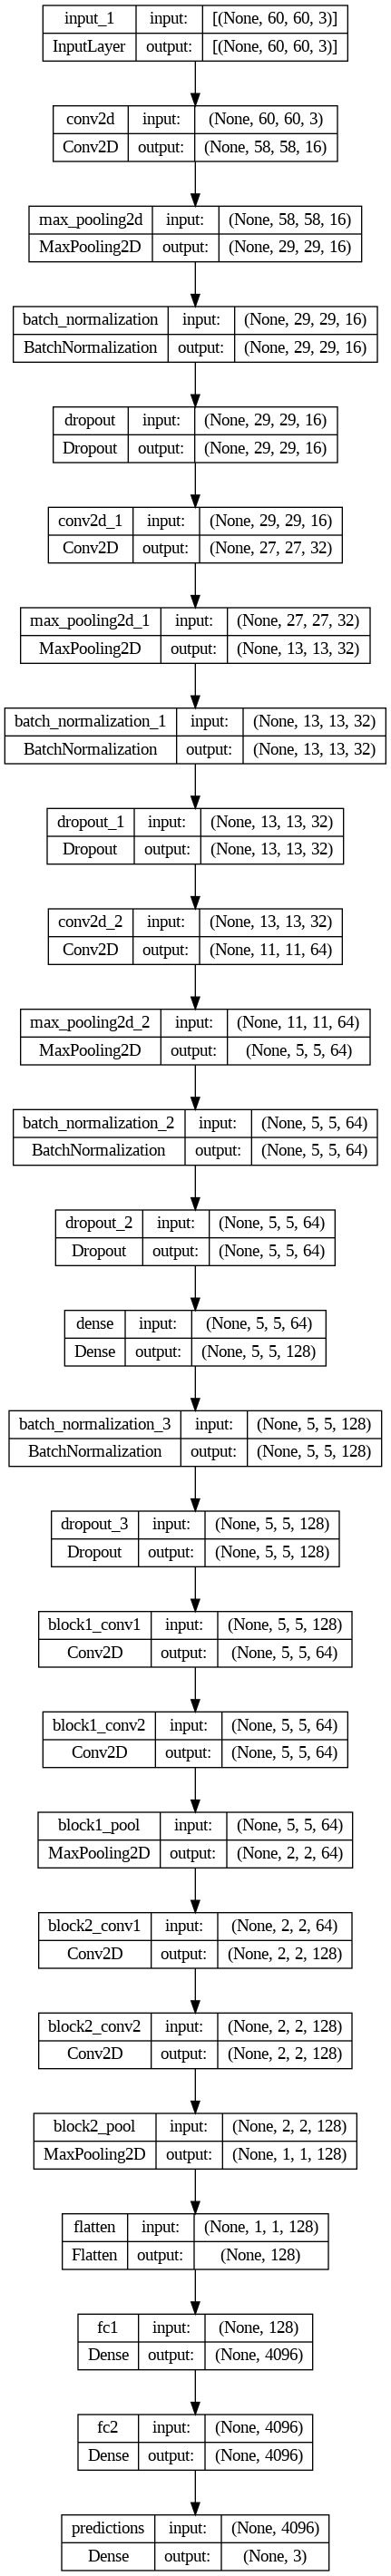

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
#Training
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
6/6 [==============================] - 4s 498ms/step - loss: 1.0724 - accuracy: 0.3583 - val_loss: 1.0468 - val_accuracy: 0.3000
Epoch 2/20
6/6 [==============================] - 3s 514ms/step - loss: 0.9299 - accuracy: 0.5389 - val_loss: 0.9978 - val_accuracy: 0.3111
Epoch 3/20
6/6 [==============================] - 5s 884ms/step - loss: 0.7862 - accuracy: 0.6333 - val_loss: 1.0536 - val_accuracy: 0.3000
Epoch 4/20
6/6 [==============================] - 4s 758ms/step - loss: 0.6498 - accuracy: 0.7500 - val_loss: 0.7956 - val_accuracy: 0.5889
Epoch 5/20
6/6 [==============================] - 5s 783ms/step - loss: 0.5025 - accuracy: 0.7917 - val_loss: 0.8035 - val_accuracy: 0.6444
Epoch 6/20
6/6 [==============================] - 6s 1s/step - loss: 0.4395 - accuracy: 0.8139 - val_loss: 0.7794 - val_accuracy: 0.5889
Epoch 7/20
6/6 [==============================] - 4s 730ms/step - loss: 0.4174 - accuracy: 0.8028 - val_loss: 0.7862 - val_accuracy: 0.6556
Epoch 8/20
6/6 [=======

In [ ]:
# Evaluating the model
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11425094306468964
Test accuracy: 0.9777777791023254


In [ ]:
# Predicting the model
y_pred = model.predict(test_x)
print(y_pred[:5])

3/3 [==============================] - 0s 53ms/step
[[1.6040588e-02 9.8337954e-01 5.7994522e-04]
 [3.4056932e-02 9.6581089e-01 1.3208220e-04]
 [9.1846108e-01 6.8498664e-02 1.3040301e-02]
 [5.3434891e-05 1.0169529e-03 9.9892956e-01]
 [1.4783062e-04 1.6061338e-03 9.9824607e-01]]


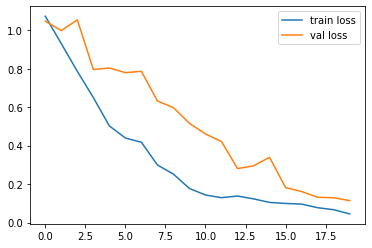

In [ ]:
# Plotting training and testing loss vs epochs
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

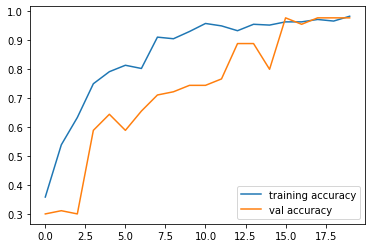

In [ ]:
# Plotting training  and testing accuracy vs epochs
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [ ]:
# classification report
print(classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=class_var))

              precision    recall  f1-score   support

          fu       0.96      0.96      0.96        25
         mri       0.97      1.00      0.99        38
        spec       1.00      0.96      0.98        27

    accuracy                           0.98        90
   macro avg       0.98      0.97      0.98        90
weighted avg       0.98      0.98      0.98        90

